In [19]:
import torch
import torchvision.models as models
from PIL import Image
import numpy as np
from torchvision import transforms

In [20]:
img_path = '../elephant.jpg'

In [21]:
img = Image.open(img_path)

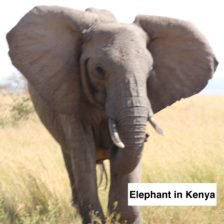

In [22]:
img

In [29]:
model = models.resnet152(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/danial/.cache/torch/checkpoints/resnet152-b121ed2d.pth
10.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

26.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

43.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub

In [30]:
import json
class_idx = json.load(open("imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [31]:
transform = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

/home/danial/dev/performant-python-services/venv/lib/python3.7/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [35]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [36]:
out = model(batch_t)
print(out.shape)
print(torch.argmax(out))
print(idx2label[int(torch.argmax(out))])

torch.Size([1, 1000])
tensor(600)
hook


In [37]:
for x in out[0].sort(descending=True)[1][:10]:
    print(idx2label[x])

hook
bucket
paper_towel
crutch
tennis_ball
plunger
water_bottle
pole
cowboy_hat
muzzle
